In [1]:
playerLevel = 70
spellPower = 2758

giftOfNature = 5
naturalist = 5
tranquilSpirit = 5
improvedRejuv = 3
improvedRegrowth = 5
empoweredTouch = 5
empoweredRejuv = 5

treeOfLife = True

idolRejuv = 0
idolTouch = 0
idolLifebloomTick = 88
idolLifebloomBomb = 0
stormrage = False
nordrassil = True
thunderheart = False

In [2]:
def getPenalty(level):
    # penalty = min(1.0, (level + 6) / playerLevel)
    penalty = level > 20 and 1.0 or (1 - ((20 - level) * 0.0375))
    penalty = penalty * min(1.0, (level + 11) / playerLevel)
    return penalty

def calc(level, amount, spModifier, healModifier):
    return (amount + (spellPower * getPenalty(level) * spModifier)) * healModifier

In [3]:
def calcRejuv(i):
    levels = [0, 4, 10, 16, 22, 28, 34, 40, 46, 52, 58, 60, 63, 69]
    amounts = [0, 32, 56, 116, 180, 244, 304, 388, 488, 608, 756, 888, 932, 1060]
    manas = [0, 25, 40, 75, 105, 135, 160, 195, 235, 280, 335, 360, 370, 415]

    spCoefficient = (1.0 + empoweredRejuv * 0.04) * 0.8
    healCoefficient = (1.0 + giftOfNature * 0.02 + improvedRejuv * 0.05) * (1.25 if stormrage else 1.0)

    foo = calc(levels[i], amounts[i], spCoefficient, healCoefficient)
    foo += idolRejuv * getPenalty(levels[i]) * spCoefficient * (1.25 if stormrage else 1.0)

    bar = manas[i] * (0.8 if treeOfLife else 1.0)

    print('Rejuv (%d) = %d (%.2f per tick)' % (i, foo, foo / (5.0 if stormrage else 4.0)))

    return foo / 1.5, foo / bar

In [4]:
def calcRegrowthHot(i):
    levels = [0, 12, 18, 24, 30, 36, 42, 48, 54, 60, 65]
    amounts = [0, 98, 175, 259, 343, 427, 546, 686, 861, 1064, 1274]

    spCoefficient = (1.0 + empoweredRejuv * 0.04) * 0.7
    healCoefficient = (1.0 + giftOfNature * 0.02) * (9.0 if nordrassil else 7.0) / 7.0

    foo = calc(levels[i], amounts[i], spCoefficient, healCoefficient)

    print('RegrowthHot (%d) = %d （%.2f per tick）' % (i, foo, foo / (9.0 if nordrassil else 7.0)))

    return foo


def calcRegrowthDirect(i, drain):
    levels = [0, 12, 18, 24, 30, 36, 42, 48, 54, 60, 65]
    amounts = [[],
               [(84, 98), (85, 100), (87, 102), (89, 104), (91, 106), (93, 107)],
               [(164, 188), (166, 191), (169, 193), (171, 196), (174, 198), (176, 201)],
               [(240, 274), (243, 278), (246, 281), (249, 284), (252, 287), (255, 290)],
               [(318, 360), (321, 364), (325, 368), (328, 371), (332, 375), (336, 378)],
               [(405, 457), (409, 462), (413, 466), (417, 470), (421, 474), (425, 478)],
               [(511, 575), (515, 580), (520, 585), (525, 590), (529, 594), (534, 599)],
               [(646, 724), (651, 730), (656, 735), (661, 740), (667, 746), (672, 751)],
               [(809, 905), (815, 911), (821, 917), (827, 923), (833, 929), (839, 935)],
               [(1003, 1119), (1009, 1126), (1016, 1133), (1023, 1140), (1030, 1147), (1037, 1153)],
               [(1215, 1355), (1222, 1363), (1230, 1371), (1238, 1379), (1245, 1386), (1253, 1394)]]

    row = amounts[i]
    cell = row[min(playerLevel - levels[i], len(row) - 1)]
    amount = sum(cell) / len(cell)

    spCoefficient = 0.5 * (2.0 / 3.5)
    healCoefficient = (1.0 + giftOfNature * 0.02) * (1.0 + (improvedRegrowth * 0.1 if drain else improvedRegrowth * 0.05))

    foo = calc(levels[i], amount, spCoefficient, healCoefficient)

    if drain:
        print('RegrowthDirect (%d) = %d (Crit)' % (i, foo))

    return foo


def calcRegrowth(i, drain):
    manas = [0, 80, 135, 185, 230, 275, 335, 405, 485, 575, 675]

    foo = calcRegrowthDirect(i, True) if drain else calcRegrowthDirect(i, False) + calcRegrowthHot(i)
    bar = manas[i] * (0.8 if treeOfLife else 1.0)

    return foo / 2.0, foo / bar

In [5]:
def calcTouch(i):
    levels = [0, 1, 8, 14, 20, 26, 32, 38, 44, 50, 56, 60, 62, 69]
    amounts = [[],
               [(37, 51), (37, 52), (38, 53), (39, 54), (40, 55)],
               [(88, 112), (89, 114), (90, 115), (91, 116), (93, 118), (94, 119)],
               [(195, 243), (196, 245), (198, 247), (200, 249), (202, 251), (204, 253)],
               [(363, 445), (365, 448), (368, 451), (371, 454), (373, 456), (376, 459)],
               [(572, 694), (575, 698), (579, 701), (582, 705), (586, 708), (589, 712)],
               [(742, 894), (746, 898), (750, 902), (754, 906), (758, 910), (762, 914)],
               [(936, 1120), (940, 1125), (945, 1129), (949, 1134), (954, 1138), (958, 1143)],
               [(1199, 1427), (1204, 1433), (1209, 1438), (1214, 1443), (1219, 1448), (1225, 1453)],
               [(1516, 1796), (1521, 1802), (1527, 1808), (1533, 1814), (1539, 1820), (1545, 1826)],
               [(1890, 2230), (1896, 2237), (1903, 2244), (1909, 2250), (1916, 2257), (1923, 2263)],
               [(2267, 2677), (2274, 2685), (2281, 2692), (2288, 2699), (2296, 2707), (2303, 2714)],
               [(2364, 2790), (2371, 2798), (2378, 2805), (2386, 2813), (2393, 2820), (2401, 2827)],
               [(2707, 3197), (2715, 3206)]]
    cast = [0, 1.5, 2.0, 2.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]
    manas = [0, 25, 55, 110, 185, 270, 335, 405, 495, 600, 720, 800, 820, 935]

    row = amounts[i]
    cell = row[min(playerLevel - levels[i], len(row) - 1)]
    amount = sum(cell) / len(cell) + idolTouch

    spCoefficient = cast[i] / 3.5
    healCoefficient = (1.0 + giftOfNature * 0.02) * (1.05 if thunderheart else 1.00)

    foo = calc(levels[i], amount, spCoefficient, healCoefficient)
    foo = foo + spellPower * empoweredTouch * 0.10 * min(1.0, (levels[i] + 11) / playerLevel)
    bar = manas[i] * (1.0 - tranquilSpirit * 0.02)

    print('Healing Touch (%d) = %d' % (i, foo))

    return foo / max(cast[i] - naturalist * 0.1, 1.5), foo / bar

In [6]:
def calcLifebloomTick():
    level = 64
    amount = 273

    spCoefficient = (1.0 + empoweredRejuv * 0.04) * 0.52
    healCoefficient = 1.0 + giftOfNature * 0.02

    foo = calc(level, amount, spCoefficient, healCoefficient)
    foo += idolLifebloomTick * getPenalty(level) * spCoefficient

    print('Lifebloom Tick = %d' % (foo / 7.0))

    return foo


def calcLifebloomBomb():
    level = 64
    amount = 600

    spCoefficient = (1.0 + empoweredRejuv * 0.04) * 0.34335
    healCoefficient = 1.0 + giftOfNature * 0.02

    foo = calc(level, amount, spCoefficient, healCoefficient)
    foo += idolLifebloomBomb * getPenalty(level) * spCoefficient

    print('Lifebloom Bomb = %d' % (foo))

    return foo

In [7]:
import matplotlib.pyplot as plt

Rejuv (1) = 323 (80.92 per tick)
Rejuv (2) = 690 (172.64 per tick)
Rejuv (3) = 1230 (307.52 per tick)
Rejuv (4) = 1785 (446.31 per tick)
Rejuv (5) = 2148 (537.23 per tick)
Rejuv (6) = 2507 (626.90 per tick)
Rejuv (7) = 2896 (724.07 per tick)
Rejuv (8) = 3304 (826.24 per tick)
Rejuv (9) = 3738 (934.66 per tick)
Rejuv (10) = 4207 (1051.83 per tick)
Rejuv (11) = 4419 (1104.90 per tick)
Rejuv (12) = 4474 (1118.65 per tick)
Rejuv (13) = 4634 (1158.65 per tick)


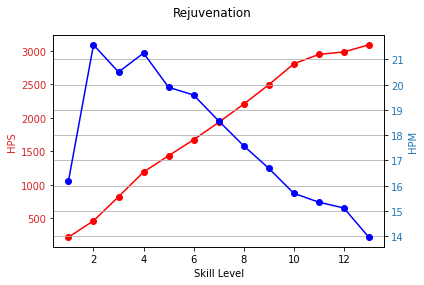

In [8]:
def plotRejuv(maxLevel):
    rejuvs = [calcRejuv(i) for i in range(1, maxLevel + 1)]

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Skill Level')
    ax1.set_ylabel('HPS', color = color)
    ax1.plot([i for i in range(1, maxLevel + 1)], [entry[0] for entry in rejuvs], 'ro-')
    ax1.tick_params(axis = 'y', labelcolor = color)


    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('HPM', color = color)
    ax2.plot([i for i in range(1, maxLevel + 1)], [entry[1] for entry in rejuvs], 'bo-')
    ax2.tick_params(axis = 'y', labelcolor = color)


    fig.suptitle('Rejuvenation')
    fig.tight_layout()
    plt.grid()
    plt.show()


plotRejuv(13)

In [9]:
def plotRegrowth(maxLevel, drain):
    regrowths = [calcRegrowth(i, drain) for i in range(1, maxLevel + 1)]

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Skill Level')
    ax1.set_ylabel('HPS', color = color)
    ax1.plot([i for i in range(1, maxLevel + 1)], [entry[0] for entry in regrowths], 'ro-')
    ax1.tick_params(axis = 'y', labelcolor = color)


    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('HPM', color = color)
    ax2.plot([i for i in range(1, maxLevel + 1)], [entry[1] for entry in regrowths], 'bo-')
    ax2.tick_params(axis = 'y', labelcolor = color)


    fig.suptitle('Regrowth Crit Direct' if drain else 'Regrowth Overall Expect')
    fig.tight_layout()
    plt.grid()
    plt.show()

RegrowthDirect (1) = 464 (Crit)
RegrowthDirect (2) = 809 (Crit)
RegrowthDirect (3) = 1099 (Crit)
RegrowthDirect (4) = 1350 (Crit)
RegrowthDirect (5) = 1617 (Crit)
RegrowthDirect (6) = 1919 (Crit)
RegrowthDirect (7) = 2269 (Crit)
RegrowthDirect (8) = 2670 (Crit)
RegrowthDirect (9) = 3106 (Crit)
RegrowthDirect (10) = 3483 (Crit)


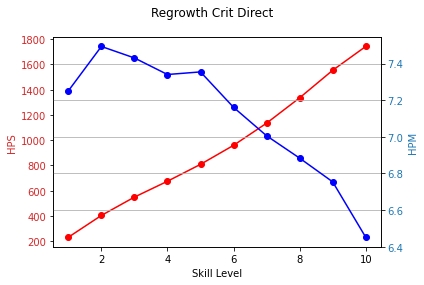

In [10]:
plotRegrowth(10, True)

RegrowthHot (1) = 892 （99.13 per tick）
RegrowthHot (2) = 1503 （167.01 per tick）
RegrowthHot (3) = 2004 （222.73 per tick）
RegrowthHot (4) = 2404 （267.13 per tick）
RegrowthHot (5) = 2803 （311.54 per tick）
RegrowthHot (6) = 3252 （361.44 per tick）
RegrowthHot (7) = 3731 （414.65 per tick）
RegrowthHot (8) = 4260 （473.35 per tick）
RegrowthHot (9) = 4781 （531.26 per tick）
RegrowthHot (10) = 5078 （564.26 per tick）


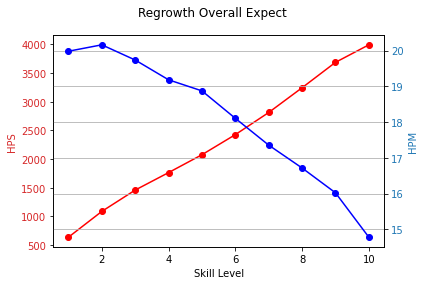

In [11]:
plotRegrowth(10, False)

Healing Touch (1) = 352
Healing Touch (2) = 750
Healing Touch (3) = 1343
Healing Touch (4) = 2221
Healing Touch (5) = 3048
Healing Touch (6) = 3632
Healing Touch (7) = 4244
Healing Touch (8) = 4940
Healing Touch (9) = 5699
Healing Touch (10) = 6525
Healing Touch (11) = 7172
Healing Touch (12) = 7288
Healing Touch (13) = 7669


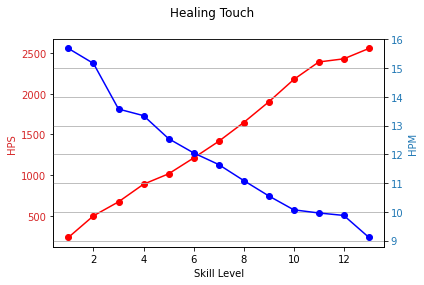

In [12]:
def plotTouch(maxLevel):
    touches = [calcTouch(i) for i in range(1, maxLevel + 1)]

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Skill Level')
    ax1.set_ylabel('HPS', color = color)
    ax1.plot([i for i in range(1, maxLevel + 1)], [entry[0] for entry in touches], 'ro-')
    ax1.tick_params(axis = 'y', labelcolor = color)


    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('HPM', color = color)
    ax2.plot([i for i in range(1, maxLevel + 1)], [entry[1] for entry in touches], 'bo-')
    ax2.tick_params(axis = 'y', labelcolor = color)


    fig.suptitle('Healing Touch')
    fig.tight_layout()
    plt.grid()
    plt.show()


plotTouch(13)

In [13]:
def plotLifebloom():
    mana = 220 * (0.8 if treeOfLife else 1.0)

    foo = calcLifebloomTick()
    bar = calcLifebloomBomb()

    print('single cast Total = %d, HPS = %d, HPM = %d' % ((foo + bar), (foo + bar)/ 1.5, (foo + bar) / mana))
    print('three stacks refresh HPS = %d, HPM = %d' % ((foo / 7.0 * 6.0 * 3.0)/ 1.5, (foo / 7.0 * 6.0 * 3.0) / mana))


plotLifebloom()

Lifebloom Tick = 321
Lifebloom Bomb = 1909
single cast Total = 4158, HPS = 2772, HPM = 23
three stacks refresh HPS = 3854, HPM = 32
